### Packages:

In [7]:
#Analysis:
import pandas as pd
import numpy as np
import os
import math

#Plotting:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona #print(fiona.__version__)
%matplotlib inline

### Data Files:

#### *Enter File Path*:

In [8]:
root_path='/Users/SamLongenbach/Desktop/DS504/project2/DS504-Divvy-Project/'
os.chdir(root_path)

In [9]:
trip_files = { # data file : file path
     'Divvy_Trips_2013.csv' : 'Divvy_Data/Divvy_Stations_Trips_2013',
     'Divvy_Trips_2014_Q1Q2.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q1Q2',
     'Divvy_Trips_2014-Q3-07.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Trips_2014-Q3-0809.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Trips_2014-Q4.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Trips_2015-Q1.csv' : 'Divvy_Data/Divvy_Trips_2015-Q1Q2',
     'Divvy_Trips_2015-Q2.csv' : 'Divvy_Data/Divvy_Trips_2015-Q1Q2',
     'Divvy_Trips_2015_07.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2015_08.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2015_09.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2015_Q4.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2016_Q1.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_04.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_05.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_06.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_Q3.csv' : 'Divvy_Data/Divvy_Trips_2016_Q3Q4',
     'Divvy_Trips_2016_Q4.csv' : 'Divvy_Data/Divvy_Trips_2016_Q3Q4',
     'Divvy_Trips_2017_Q1.csv' : 'Divvy_Data/Divvy_Trips_2017_Q1Q2',
     'Divvy_Trips_2017_Q2.csv' : 'Divvy_Data/Divvy_Trips_2017_Q1Q2',
     'Divvy_Trips_2017_Q3.csv' : 'Divvy_Data/Divvy_Trips_2017_Q3Q4',
     'Divvy_Trips_2017_Q4.csv' : 'Divvy_Data/Divvy_Trips_2017_Q3Q4',
     'Divvy_Trips_2018_Q1.csv' : 'Divvy_Data/', 
     'Divvy_Trips_2018_Q2.csv' : 'Divvy_Data/', 
     'Divvy_Trips_2018_Q3.csv' : 'Divvy_Data/', 
     'Divvy_Trips_2018_Q4.csv' : 'Divvy_Data/'}

station_files = { # data file : file path
     'Divvy_Stations_2013.csv' : 'Divvy_Data/Divvy_Stations_Trips_2013', 
     'Divvy_Stations_2014-Q1Q2.xlsx' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q1Q2',
     'Divvy_Stations_2014-Q3Q4.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Stations_2015.csv' : 'Divvy_Data/Divvy_Trips_2015-Q1Q2',
     'Divvy_Stations_2016_Q1Q2.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Stations_2016_Q4.csv' : 'Divvy_Data/Divvy_Trips_2016_Q3Q4',
     'Divvy_Stations_2017_Q1Q2.csv' : 'Divvy_Data/Divvy_Trips_2017_Q1Q2',
     'Divvy_Stations_2017_Q3Q4.csv' : 'Divvy_Data/Divvy_Trips_2017_Q3Q4' 
}

### Load Station Data:

In [10]:
file, folder = list(station_files.items())[0]
os.chdir(root_path + folder)
S_2013 = pd.read_csv(file) ##

#file, folder = list(station_files.items())[1]
#os.chdir(root_path + folder)
#S_2014_Q12 = pd.read_csv(file)

file, folder = list(station_files.items())[2]
os.chdir(root_path + folder)
S_2014_Q34 = pd.read_csv(file) ##

file, folder = list(station_files.items())[3]
os.chdir(root_path + folder)
S_2015_Q12 = pd.read_csv(file) ##

file, folder = list(station_files.items())[4]
os.chdir(root_path + folder)
S_2016_Q12 = pd.read_csv(file) ##

file, folder = list(station_files.items())[5]
os.chdir(root_path + folder)
S_2016_Q34 = pd.read_csv(file) ##

file, folder = list(station_files.items())[6]
os.chdir(root_path + folder)
S_2017_Q12 = pd.read_csv(file) ##

file, folder = list(station_files.items())[7]
os.chdir(root_path + folder)
S_2017_Q34 = pd.read_csv(file) ##

In [11]:
old = S_2013['id']
new = S_2017_Q34['id']

print(len(np.setdiff1d(old,new)))
print(len(np.setdiff1d(new,old)))

0
285


### Plot of Station Locations:

In [13]:
l = list()
for i in S_2017_Q34['id']: #Most recent Station csv file
    if i in S_2013['id'].tolist():
        l.append("2013/2014")
    elif i in S_2015_Q12['id'].tolist():
        l.append("2015")
    elif i in S_2016_Q34['id'].tolist():   
        l.append("2016")
    else:
        l.append("2017")

S_2017_Q34['Existence'] = l

#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
S_points = [Point(xy) for xy in zip(S_2017_Q34['longitude'],S_2017_Q34['latitude'])] 
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(S_2017_Q34,
                         crs = crs,
                         geometry = S_points)
chi_map = gpd.read_file(root_path + 'chi_town.shp')

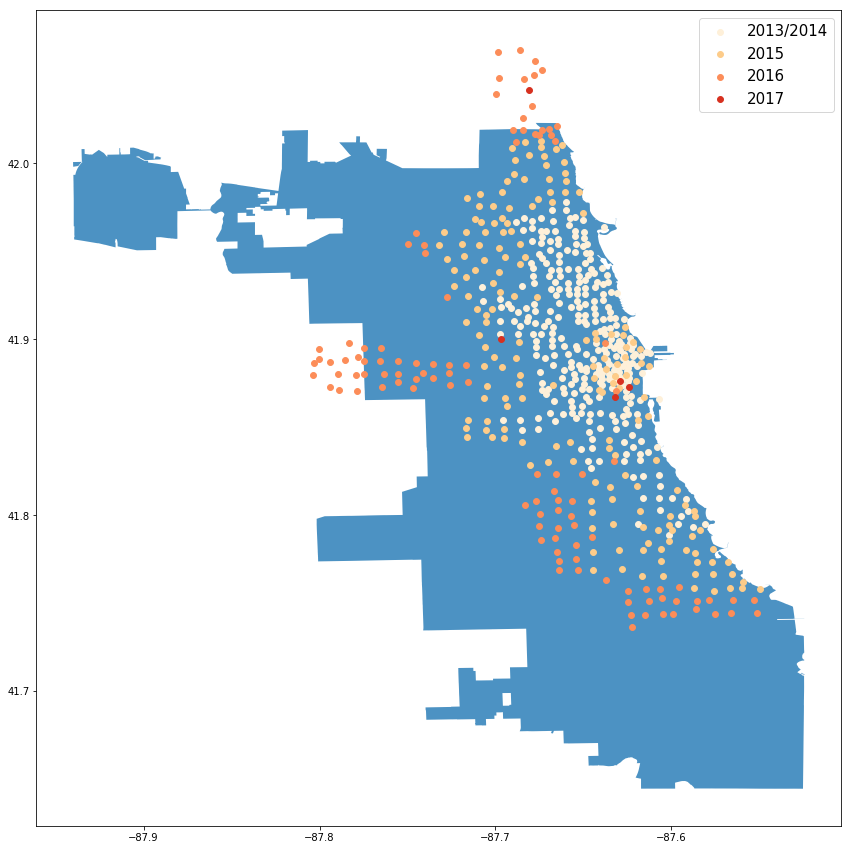

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
chi_map.plot(ax=ax,alpha=0.8)
#geo_df.plot(ax=ax,markersize=20)
pt_size = 35
geo_df[geo_df['Existence']=='2013/2014'].plot(ax=ax,markersize=pt_size,color="#fef0d9",label="2013/2014")
geo_df[geo_df['Existence']=='2015'].plot(ax=ax,markersize=pt_size,color="#fdcc8a",label="2015")
geo_df[geo_df['Existence']=='2016'].plot(ax=ax,markersize=pt_size,color="#fc8d59",label="2016")
geo_df[geo_df['Existence']=='2017'].plot(ax=ax,markersize=pt_size,color="#d7301f",label="2017")
plt.legend(prop={'size':15})
#for i, txt in enumerate(geo_df['id']):
#    ax.annotate(txt, (geo_df['longitude'][i], geo_df['latitude'][i]))

In [15]:
geo_df

,id,name,city,latitude,longitude,dpcapacity,online_date,Unnamed: 7,Existence,geometry
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43,NaN,2015,POINT (-87.620328 41.876393)
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44,NaN,2015,POINT (-87.61535539 41.86722596)
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46,NaN,2015,POINT (-87.613348 41.856268)
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46,NaN,2013/2014,POINT (-87.62771600000001 41.874053)
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,6/10/2013 11:18,NaN,2015,POINT (-87.61279399999999 41.88504099999999)
5,7,Field Blvd & South Water St,Chicago,41.886349,-87.617517,19,6/19/2013 10:00,NaN,2015,POINT (-87.61751655 41.88634906)
6,9,Leavitt St & Archer Ave,Chicago,41.828792,-87.680604,19,6/21/2013 9:33,NaN,2015,POINT (-87.68060446 41.82879202)
7,11,Jeffery Blvd & 71st St,Chicago,41.766638,-87.576450,11,6/21/2013 9:39,NaN,2015,POINT (-87.57645011 41.76663824)
8,12,South Shore Dr & 71st St,Chicago,41.766409,-87.565688,15,6/21/2013 10:00,NaN,2015,POINT (-87.56568756999999 41.76640946)
9,13,Wilton Ave & Diversey Pkwy,Chicago,41.932418,-87.652705,27,6/22/2013 18:29,NaN,2013/2014,POINT (-87.65270500000001 41.932418)


### Manhattan Distance btw Stations:

#### *Enter Station File to Create Matrix*: ex. S_2013, S_2014_Q34, ... S_2017_Q34

In [16]:
STATION_DATA = S_2013.sort_values(by=['id']) # Always sort Ids so they match Time Matrix below

In [27]:
S,r = STATION_DATA, len(STATION_DATA)
D = np.zeros((r,r))
for i,s in enumerate(S['id']):
    S_ll = S[S['id']==s][['longitude','latitude']]
    long, lat = np.repeat(S_ll['longitude'],r), np.repeat(S_ll['latitude'],r)
    longs, lats = np.array(S['longitude']), np.array(S['latitude'])
    dist = (longs - long).abs() + (lats - lat).abs()
    #dist = haversine(longs,0,long,0) + haversine(0,lats,0,lat)
    D[i,:] = dist*100

In [28]:
DD = pd.DataFrame(D, columns=STATION_DATA['id'], index=STATION_DATA['id'])
DD

id,5,13,14,15,16,17,19,20,21,22,...,342,343,344,345,346,347,348,349,350,351
id,,,,,,,,,,,,,,,,,,,,,
5,0.000000,8.348335,3.920557,4.452461,8.114745,7.435245,3.779757,6.139161,3.081601,3.222287,...,4.864457,8.616045,14.327845,12.067355,4.233845,11.768945,8.764757,7.652245,6.201545,9.204455
13,8.348335,0.000000,7.602190,7.812530,4.200626,4.922926,7.139826,2.372456,5.688056,6.582356,...,8.224526,0.990326,5.979510,20.415690,5.819526,3.420610,12.124826,0.696090,5.160026,17.552790
14,3.920557,7.602190,0.000000,0.550826,7.368600,6.689100,2.125400,5.393016,2.335456,1.580950,...,3.579100,7.869900,13.581700,12.813500,3.487700,11.022800,4.844200,7.305300,5.455400,9.950600
15,4.452461,7.812530,0.550826,0.000000,6.817774,6.138274,1.574574,5.440074,2.124474,1.230174,...,3.028274,7.319074,13.030874,13.364326,2.936874,10.471974,4.312296,7.837204,4.904574,10.501426
16,8.114745,4.200626,7.368600,6.817774,0.000000,0.722300,5.243200,1.975584,5.033144,5.787650,...,4.023900,3.210300,6.213100,20.182100,3.880900,4.417400,7.924200,4.225300,1.913200,17.319200
17,7.435245,4.922926,6.689100,6.138274,0.722300,0.000000,4.563700,2.550470,4.353644,5.108150,...,3.301600,3.932600,6.892600,19.502600,3.201400,5.139700,7.201900,4.947600,1.233700,16.639700
19,3.779757,7.139826,2.125400,1.574574,5.243200,4.563700,0.000000,4.767370,1.451770,0.557470,...,1.453700,6.149500,11.456300,14.938900,1.362300,8.897400,4.985000,7.164500,3.330000,12.076000
20,6.139161,2.372456,5.393016,5.440074,1.975584,2.550470,4.767370,0.000000,3.315600,4.209900,...,5.852070,2.476884,8.188684,18.206516,3.447070,5.629784,9.752370,2.397130,2.787570,15.343616
21,3.081601,5.688056,2.335456,2.124474,5.033144,4.353644,1.451770,3.315600,0.000000,0.894300,...,2.536470,5.534444,11.246244,15.148956,1.152244,8.687344,6.436770,5.712730,3.119944,12.286056


### Travel Time btw Stations:

In [19]:
def column_rename(df): #Because Divvy_Trips_2018_Q1.csv is formatted with odd column names
    df = df.rename(index=str, columns={"01 - Rental Details Rental ID": "trip_id",
                              "01 - Rental Details Local Start Time": "start_time",
                              "01 - Rental Details Local End Time": "end_time",
                              "01 - Rental Details Bike ID": "bikeid",
                              "01 - Rental Details Duration In Seconds Uncapped": "tripduration",
                              "03 - Rental Start Station ID": "from_station_id",
                              "03 - Rental Start Station Name": "to_station_name",
                              "02 - Rental End Station ID": "to_station_id",
                              "02 - Rental End Station Name": "to_station_name",
                              "User Type": "usertype",
                              "Member Gender": "gender",
                              "05 - Member Details Member Birthday Year": "birthyear"})
    return df

In [20]:
def trip_duration_matrix(Station_Ids, Trip_Data):
    if Trip_Data['tripduration'].dtypes=='O':
        Trip_Data['tripduration'] = Trip_Data['tripduration'].str.replace(",","").astype(float)
    
    Trip_Dat = Trip_Data[['tripduration','from_station_id','to_station_id','usertype']]
    r = len(Station_Ids)
    M,N = np.zeros((r,r)), np.zeros((r,r))
    for i,i_d in enumerate(Station_Ids):
        Ti = Trip_Dat[Trip_Dat['from_station_id']==i_d]
        Ti_sum = Ti.groupby(['to_station_id'],sort=True).sum()
        Ti_count = Ti.groupby(['to_station_id'],sort=True).count()
        "----------------------------------------------"
        Ti_to = Ti_sum.index.get_level_values(0).tolist()
        Ti_dur = Ti_sum['tripduration'].tolist()
        Ti_n = Ti_count['tripduration'].tolist()
        temp_sum, temp_count, j = list(), list(), 0
        for j_d in Station_Ids:
            if j_d in Ti_to:
                temp_sum.append(Ti_dur[j])
                temp_count.append(Ti_n[j])
                j+=1 
            else:
                temp_sum.append(0)
                temp_count.append(0)
        M[i,:] = temp_sum   
        N[i,:] = temp_count
    return M, N

In [21]:
def remove_extinct_station_data(Station_Ids, Trip_Data):
    from_id = 'from_station_id'
    to_id = 'to_station_id'

    fr = np.setdiff1d(Trip_Data[from_id],Station_Ids)
    to = np.setdiff1d(Trip_Data[to_id],Station_Ids)
    extinct_ids = list(np.union1d(fr,to))
    print(extinct_ids)
    if len(extinct_ids)==0:
        return Trip_Data
    else:
        for ex_id in extinct_ids:
            Trip_Data = Trip_Data[Trip_Data[from_id]!=ex_id]
            Trip_Data = Trip_Data[Trip_Data[to_id]!=ex_id]
    return Trip_Data        

In [25]:
Station_Ids = STATION_DATA['id'] #Use ordered ids from above so Distance Matrix matches Time Matrix
dim = len(Station_Ids)
M_total, N_total = np.zeros((dim,dim)), np.zeros((dim,dim))
for f in range(len(trip_files)):
    file, folder = list(trip_files.items())[f]
    os.chdir(root_path + folder)
    print(f,':--------')
    Trip_CSV_f = pd.read_csv(file)
    if file=="Divvy_Trips_2018_Q1.csv": #patch
        Trip_CSV_f = column_rename(Trip_CSV_f)
    print(file,'Entries:',Trip_CSV_f.shape[0])
    Trip_Data = remove_extinct_station_data(Station_Ids, Trip_CSV_f)
    print('Entries Removed:',(Trip_CSV_f.shape[0] - Trip_Data.shape[0]))
    M, N = trip_duration_matrix(Station_Ids, Trip_Data)
    M_total = M_total + M
    N_total = N_total + N
    if int(sum(sum(N))) != int(Trip_Data.shape[0]):
        print('Houston, we have a problem..')
        break
        

0 :--------


/Users/SamLongenbach/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Divvy_Trips_2013.csv Entries: 759788
[]
Entries Removed: 0
1 :--------
Divvy_Trips_2014_Q1Q2.csv Entries: 905699
[]
Entries Removed: 0
2 :--------
Divvy_Trips_2014-Q3-07.csv Entries: 410340
[]
Entries Removed: 0
3 :--------
Divvy_Trips_2014-Q3-0809.csv Entries: 700630
[]
Entries Removed: 0
4 :--------
Divvy_Trips_2014-Q4.csv Entries: 437965
[]
Entries Removed: 0
5 :--------
Divvy_Trips_2015-Q1.csv Entries: 202349
[]
Entries Removed: 0
6 :--------
Divvy_Trips_2015-Q2.csv Entries: 893890
[2, 3, 4, 6, 7, 9, 11, 12, 18, 38, 39, 40, 41, 89, 95, 96, 101, 102, 103, 107, 125, 133, 142, 145, 161, 172, 180, 182, 270, 352, 353, 354, 355, 356, 359, 364, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 381, 382, 383, 384, 385, 386, 388, 390, 391, 392, 393, 395, 396, 397, 398, 399, 400, 401, 402, 403, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 

Entries Removed: 127880
15 :--------
Divvy_Trips_2016_Q3.csv Entries: 1441811
[2, 3, 4, 6, 7, 9, 11, 12, 18, 38, 39, 40, 41, 89, 95, 96, 101, 102, 103, 107, 125, 133, 142, 145, 161, 172, 180, 182, 270, 352, 353, 354, 355, 356, 359, 364, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 381, 382, 383, 384, 385, 386, 388, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 514, 515, 517, 518, 519, 520, 522, 523, 524, 525, 526, 527, 528

Entries Removed: 203095
21 :--------
Divvy_Trips_2018_Q1.csv Entries: 387145
[2, 3, 4, 6, 7, 9, 11, 12, 18, 38, 39, 40, 41, 89, 95, 96, 101, 102, 103, 107, 125, 133, 142, 145, 161, 172, 180, 182, 270, 352, 353, 354, 355, 356, 359, 360, 363, 364, 365, 366, 367, 368, 369, 370, 373, 374, 375, 376, 377, 378, 381, 382, 383, 384, 385, 386, 388, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 514, 515, 517, 518, 519, 520, 522, 523, 524, 525, 526,

In [26]:
#np.array_str(M_total/N_total, precision=0, suppress_small=True)
MdivN = pd.DataFrame(M_total/N_total, columns=STATION_DATA['id'], index=STATION_DATA['id'])
MdivN

/Users/SamLongenbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/SamLongenbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


id,5,13,14,15,16,17,19,20,21,22,...,342,343,344,345,346,347,348,349,350,351
id,,,,,,,,,,,,,,,,,,,,,
5,2576.472617,2166.000000,1281.126761,1282.716814,2366.333333,2209.050000,1054.976190,1334.500000,820.534483,1024.427807,...,1352.864865,NaN,NaN,3201.750000,1034.315789,2966.000000,NaN,1503.000000,1929.571429,2750.000000
13,2722.000000,2059.809992,2131.666667,1835.000000,1109.932692,1605.155556,1508.166667,756.608527,2017.000000,2568.333333,...,1918.500000,584.337778,1259.730159,NaN,1554.200000,936.647059,1403.142857,311.022453,1408.450000,NaN
14,1376.539474,2892.400000,2684.027322,403.371938,2168.250000,2333.800000,774.356383,1367.000000,803.781818,974.722467,...,733.372294,NaN,NaN,4658.000000,930.246753,NaN,1241.857143,1356.666667,1480.900000,1134.333333
15,1315.827586,2022.000000,555.618644,2163.637343,1878.416667,1521.000000,801.405868,3945.666667,647.962406,522.770386,...,793.375000,NaN,NaN,NaN,875.342593,NaN,65076.931034,1329.888889,1492.857143,1552.000000
16,2637.222222,1230.039062,1580.800000,1770.153846,1993.334586,383.287500,2200.833333,586.128232,1480.444444,1416.000000,...,1272.632353,831.090909,1741.500000,NaN,1155.807692,2090.277778,2069.500000,1234.311321,644.820809,NaN
17,1841.375000,2437.066667,1880.833333,1575.461538,436.720227,1871.462112,1455.900000,891.030303,1185.509804,1430.055556,...,1947.307692,1002.000000,2386.000000,NaN,868.248062,1724.714286,1907.000000,2049.239130,502.992188,73983.000000
19,1076.992701,1051.727273,977.819767,514.505882,1316.363636,1594.250000,1701.421649,1084.916667,929.120130,255.589444,...,482.712601,1692.000000,NaN,2411.000000,602.840108,NaN,1208.478261,2634.142857,1137.608696,2944.571429
20,3147.000000,750.325323,1655.000000,1689.125000,608.060472,872.522523,1141.461538,1141.156746,1492.833333,1356.000000,...,1520.600000,687.754864,1960.333333,NaN,1233.428571,1431.583333,NaN,732.711790,923.814815,295.133333
21,1165.484375,2836.636364,1000.358025,702.677419,1450.772727,1319.964286,554.276630,1575.772727,1541.302425,616.589744,...,680.494764,1538.000000,4110.500000,4673.500000,424.291874,NaN,1436.200000,1571.076923,886.182692,672.500000


### Save Matrices: 

In [29]:
os.chdir(root_path)
np.savetxt("station_locations.csv",STATION_DATA[['id','longitude','latitude']], delimiter=",")
np.savetxt("distance_matrix.csv",DD, delimiter=",")
np.savetxt("time_matrix.csv",MdivN , delimiter=",")